In [ ]:
### READING THE DATASET

import pandas as pd
import os as os
import numpy as np
# Creating empty list for broken tooth and healthy gearbox datasets
broken = []
healthy = []

# Defining the path where the datasets are stored
pth1 = 'dataset/BrokenTooth'
pth2 = 'dataset/Healthy'

# Reading the dataset as the list items using the OS library to access the files and read_csv function from pandas to read the daatasets 
# **Reading each file in the BrokenTooth and Healthy directories and appending it to the respective lists as pandas' DataFrame object (abbr.: df)
for file_name in sorted(os.listdir(pth1)):
    this_df = pd.read_csv(os.path.join(pth1, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 0
    broken.append(this_df)

for file_name in sorted(os.listdir(pth2)):
    this_df = pd.read_csv(os.path.join(pth2, file_name))
    this_df['load'] = 10*int(file_name[5])
    this_df['gearbox_status'] = 1
    healthy.append(this_df)

print(broken[3])
print(healthy[3])

In [105]:
# Aggregating dataset based on health status
broken_agg = broken[0]
healthy_agg = healthy[0]
for i in range(1,10):
    broken_agg = pd.concat([broken_agg, broken[i]], ignore_index=True)
    healthy_agg = pd.concat([healthy_agg, healthy[i]], ignore_index=True)

In [38]:
import math

def divide_into(df, n):
    group_size = n
    df_groups = []
    for i in range(math.ceil(df['a1'].count()/group_size)):
        new_df = df.iloc[i*group_size:(i+1)*group_size, :]
        df_groups.append(new_df)
    return df_groups

def get_group_stdevs(df, n):
    groups = divide_into(df, n)
    stdevs = pd.DataFrame(map(pd.DataFrame.std, groups))
    stdevs['load'] = df['load']
    stdevs['gearbox_status'] = df['gearbox_status']
    
    return stdevs

broken_stdev = []
for i in range(0,10):
    broken_stdev.append(get_group_stdevs(broken[i], 100))

healthy_stdev = []
for i in range(0,10):
    healthy_stdev.append(get_group_stdevs(healthy[i], 100))

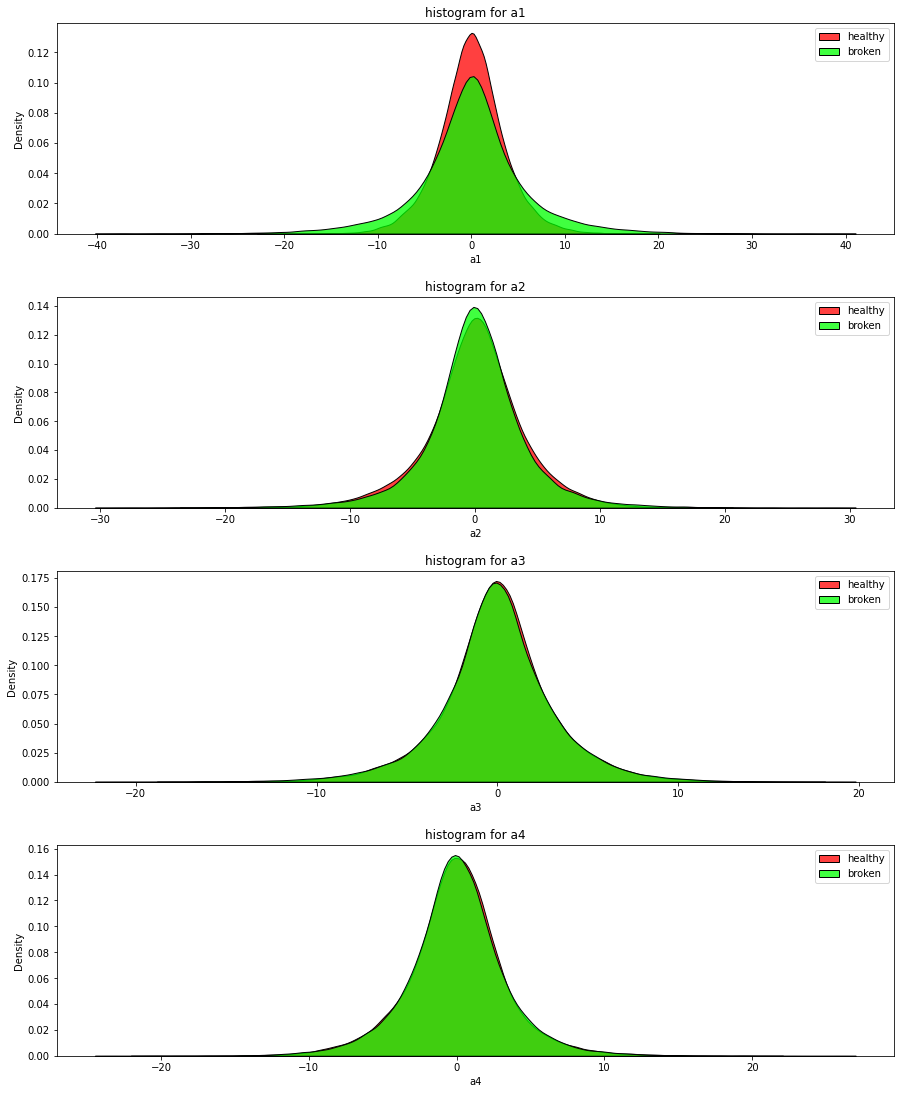

In [133]:
### DATA VISUALISATION

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

load = 0

plt.figure(figsize=(15,28*5))
plt.subplots_adjust(hspace = 0.3)
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(['a1','a2','a3','a4']):
    ax = plt.subplot(gs[i])
    sns.kdeplot(data = broken[load][col], color = "red", multiple="stack")
    sns.kdeplot(data = healthy[load][col], color = "lime", multiple="stack")
    plt.legend(['healthy', 'broken'])
    ax.set_title('histogram for ' + str(col))
plt.show()

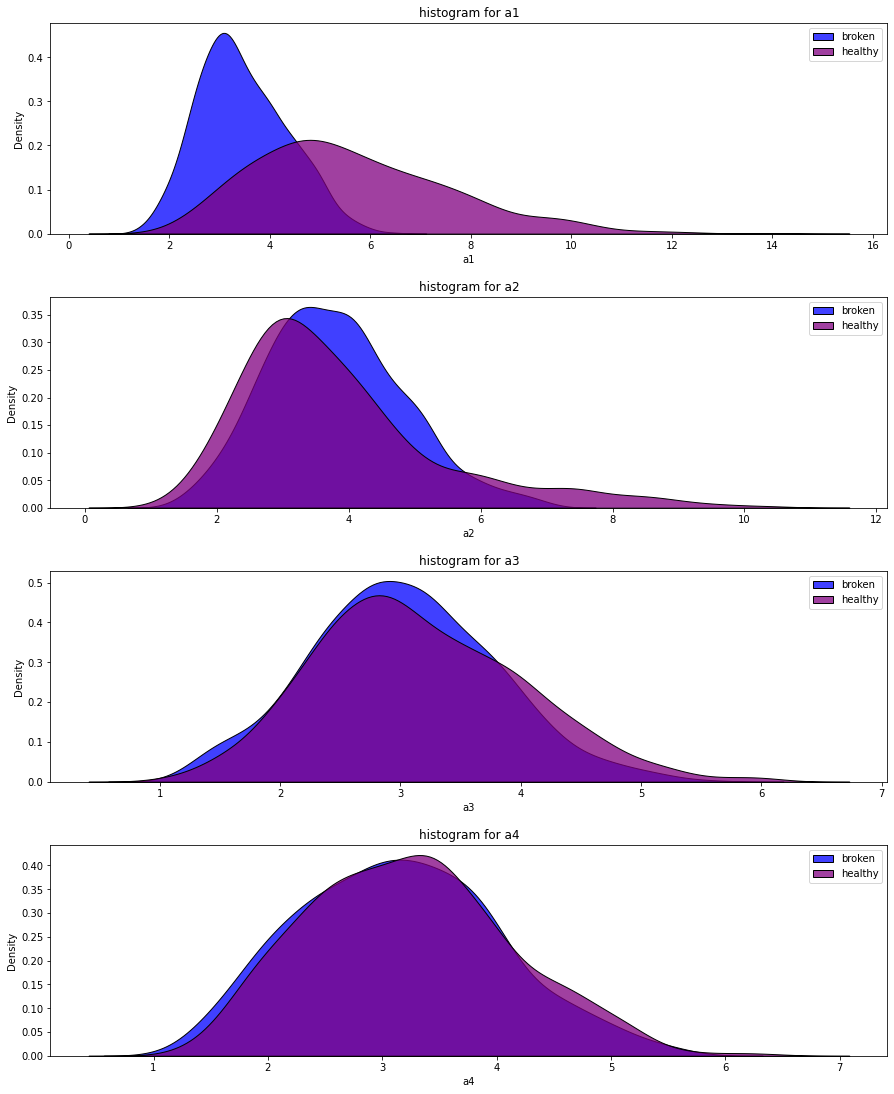

In [121]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

load = 0

plt.figure(figsize=(15,28*5))
plt.subplots_adjust(hspace = 0.3)
gs = gridspec.GridSpec(28, 1)
for i, val in enumerate(['a1','a2','a3','a4']):
    ax = plt.subplot(gs[i])
    sns.kdeplot(data = broken_stdev[load][val], color = "blue", multiple="stack")
    sns.kdeplot(data = healthy_stdev[load][val], color = "purple", multiple="stack")
    plt.legend(['broken', 'healthy'])
    ax.set_title('histogram for ' + str(val))
plt.show()

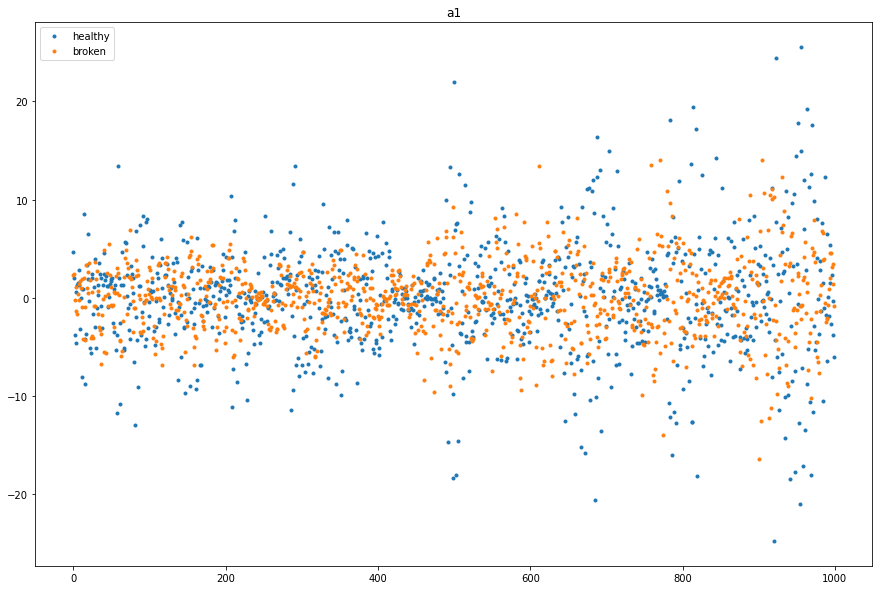

In [132]:
# def time_series(df):
#     dataset_plot = df.iloc[0:1000, :]
#     fig, axes = plt.subplots(nrows=2, ncols=2)

#     a1 = dataset_plot.iloc[:,0]
#     a2 = dataset_plot.iloc[:,1]
#     a3 = dataset_plot.iloc[:,2]
#     a4 = dataset_plot.iloc[:,3]
#     a1.plot(ax=axes[0,0], style='.')
#     a2.plot(ax=axes[0,1], style='.')
#     a3.plot(ax=axes[1,0], style='.')
#     a4.plot(ax=axes[1,1], style='.')

# def autocorrelation(df):
#     dataset_plot = df.iloc[0:1000, :]
#     autocorrelation_plot(dataset_plot.iloc[:,0])
#     autocorrelation_plot(dataset_plot.iloc[:,1])
#     autocorrelation_plot(dataset_plot.iloc[:,2])
#     autocorrelation_plot(dataset_plot.iloc[:,3])
#     plt.show()

# # time_series(broken_stdev[0])
# autocorrelation(broken[0])

# autocorrelation_plot(broken[0].iloc[:,0])
# autocorrelation_plot(healthy[0].iloc[:,0])
load = 0
plt.figure(figsize=(15,2*5))
healthy[load].iloc[:1000,0].plot(style='.')
broken[load].iloc[:1000,0].plot(style='.')
plt.title('a1')
plt.legend(['healthy', 'broken'])
plt.show()

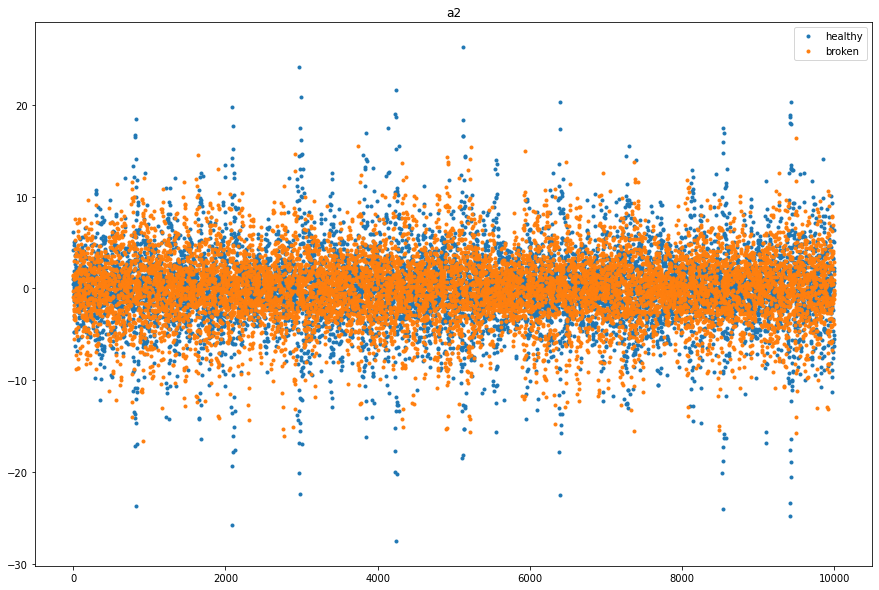

In [125]:
load = 0
plt.figure(figsize=(15,2*5))
healthy[load].iloc[:10000,1].plot(style='.')
broken[load].iloc[:10000,1].plot(style='.')
plt.title('a2')
plt.legend(['healthy', 'broken'])
plt.show()

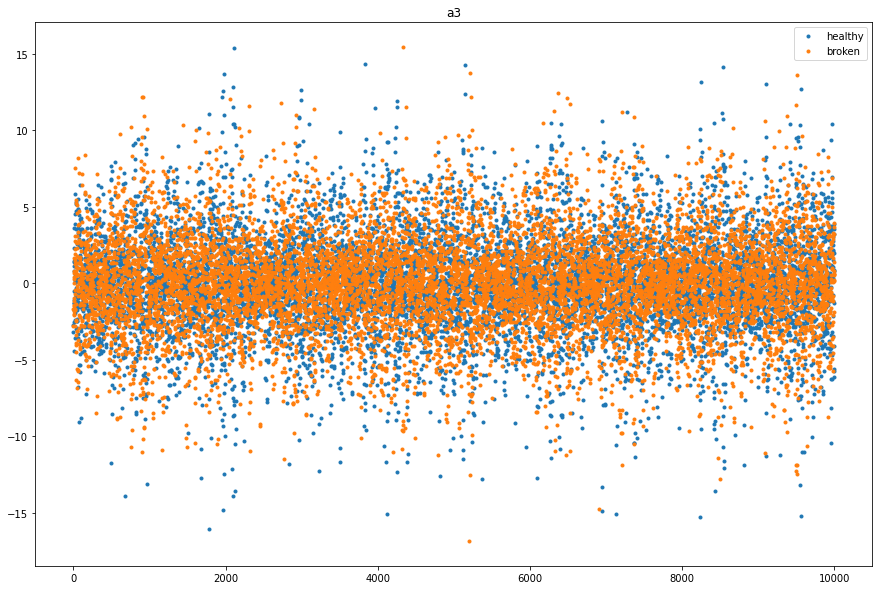

In [128]:
load = 0
plt.figure(figsize=(15,2*5))
healthy[load].iloc[:10000,2].plot(style='.')
broken[load].iloc[:10000,2].plot(style='.')
plt.title('a3')
plt.legend(['healthy', 'broken'])
plt.show()

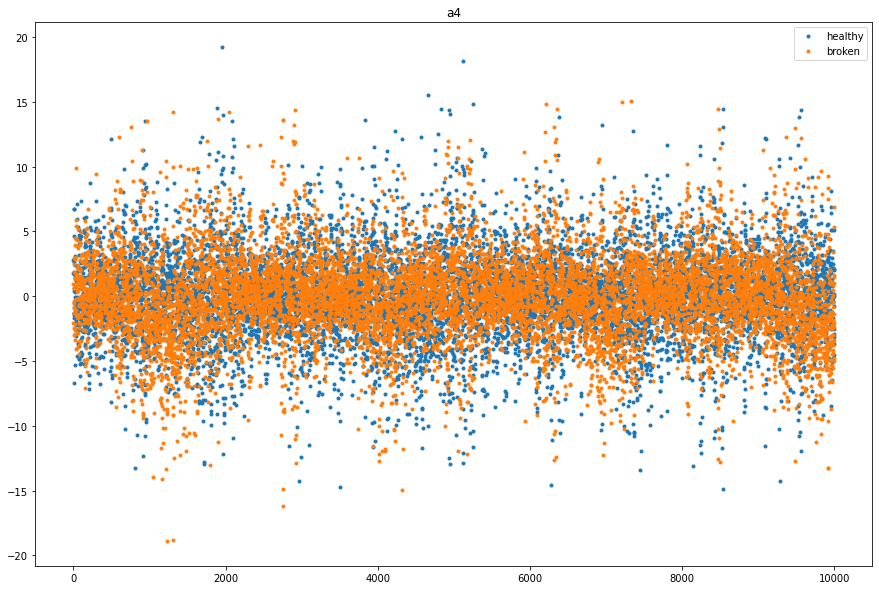

In [130]:
load = 0
plt.figure(figsize=(15,2*5))
healthy[load].iloc[:10000,3].plot(style='.')
broken[load].iloc[:10000,3].plot(style='.')
plt.title('a4')
plt.legend(['healthy', 'broken'])
plt.show()

In [131]:
# load = 0
# plt.figure(figsize=(15,2*5))
# healthy_agg.iloc[:100000,0].plot()
# broken_agg.iloc[:100000,0].plot()
# plt.legend(['healthy', 'broken'])
# plt.show()

<AxesSubplot:ylabel='a1'>

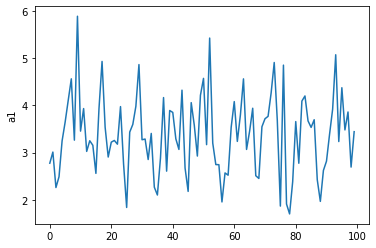

In [142]:
sns.lineplot(data=broken_stdev[0].iloc[:100,0])

<AxesSubplot:xlabel='a1', ylabel='Density'>

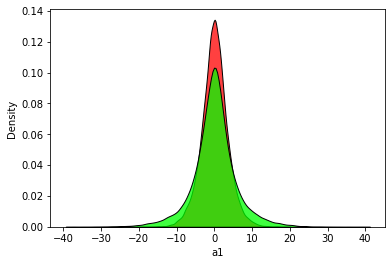

In [93]:
### DIVIDING THE DATASET FOR TRAINING, TESTING AND EVALUATION

import math

def segregate(df, load, fracs):
    total_size = len(df[load])
    train_frac = fracs[0]
    test_frac = fracs[1]
    eval_frac = fracs[2]

    training_set = df[load][['a1', 'load', 'gearbox_status']].iloc[:math.ceil(total_size * train_frac), :]
    testing_set = df[load][['a1', 'load', 'gearbox_status']].iloc[math.ceil(total_size * train_frac):math.ceil(total_size * (train_frac + test_frac)), :]
    eval_set = df[load][['a1', 'load', 'gearbox_status']].iloc[math.ceil(total_size * (train_frac + test_frac)):, :]
    
    return {
        'training': training_set,
        'testing': testing_set,
        'eval': eval_set
    }

def n(stdev, mean):
    return (1/(stdev * math.sqrt(2*math.pi)))*(math.e)**(-0.5*((-mean/stdev)**2))

# def ishealthy(x, tolerance):
#     h = segregate(healthy, load = 0, fracs = [0.6, 0.2, 0.2])['training']['a1']
#     return n(h.std(), h.mean())*(1 - tolerance) < n(x.std(), x.mean()) and n(x.std(), x.mean()) < n(h.std(), h.mean())*(1 + tolerance)

H = segregate(healthy, load = 0, fracs = [0.6, 0.2, 0.2])
B = segregate(broken, load = 0, fracs = [0.6, 0.2, 0.2])

h = H['training']['a1']
b = B['training']['a1']

sns.kdeplot(data = b, color="red", multiple="stack")
sns.kdeplot(data = h, color="lime", multiple="stack")

# x = divide_into(H['testing'], 500)
# y = divide_into(B['testing'], 500)

# print(pd.DataFrame(map(lambda el: ishealthy(el['a1'], 0.5), x)))
# print(ishealthy(x[0]['a1'], tolerance = 0.086))
# print(ishealthy(y, tolerance = 0.05))